In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [20]:
df = pd.read_csv('merged_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [21]:
df.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [22]:
money_df = df[['HIVincidence','HIVdiagnoses', 'HIVprevalence', 'unemployment_rate', 'poverty_rate', 'household_income']]

In [23]:
money_df.corr()

,HIVincidence,HIVdiagnoses,HIVprevalence,unemployment_rate,poverty_rate,household_income
HIVincidence,1.000000,0.267121,0.421939,0.132974,0.091102,0.192512
HIVdiagnoses,0.267121,1.000000,0.427513,0.068800,0.014922,0.888145
HIVprevalence,0.421939,0.427513,1.000000,0.326536,0.276576,0.330398
unemployment_rate,0.132974,0.068800,0.326536,1.000000,0.625880,0.061042
poverty_rate,0.091102,0.014922,0.276576,0.625880,1.000000,-0.062332
household_income,0.192512,0.888145,0.330398,0.061042,-0.062332,1.000000


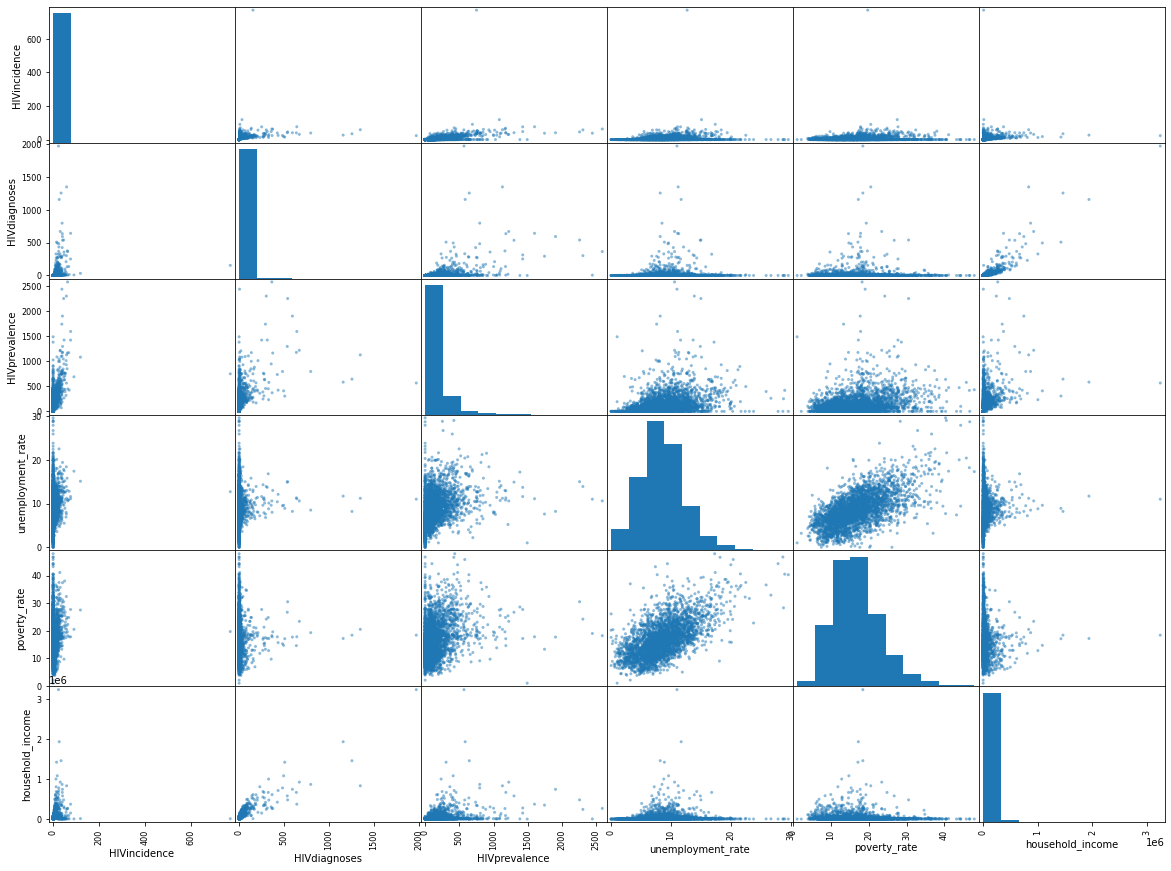

In [24]:
scatter_matrix(money_df, figsize=(20,15));

NameError: name 'LinearRegression' is not defined

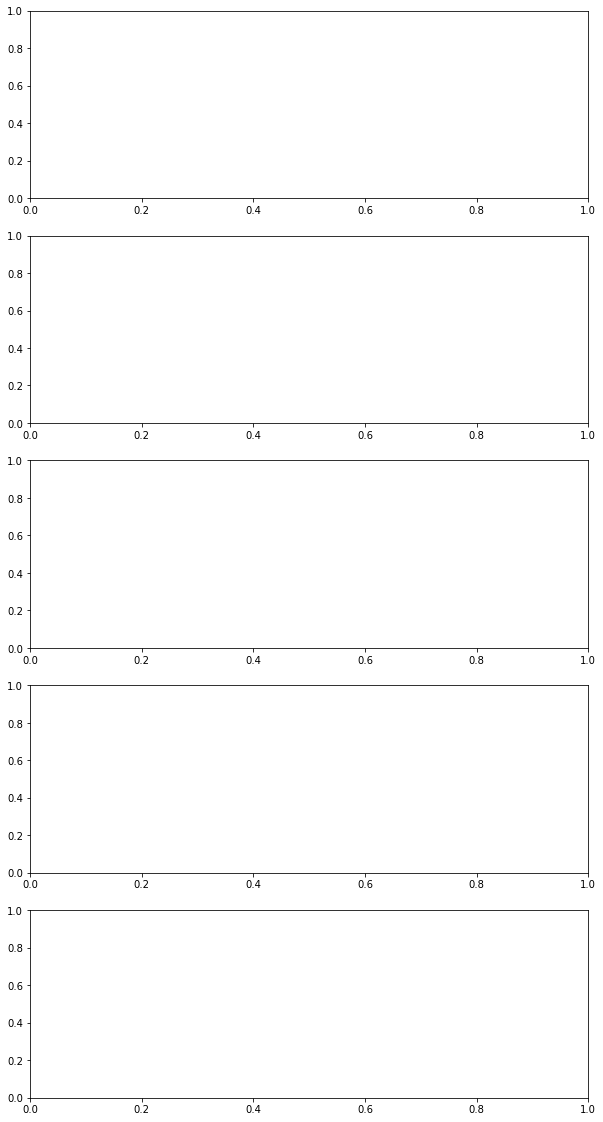

In [25]:
fig, axs = plt.subplots(5, figsize = (10,20))
columns = money_df.drop('HIVincidence',axis=1).columns
y = money_df['HIVincidence']
model = LinearRegression()
for i, ax in enumerate(axs.flatten()):
    X = money_df[columns[i]].values.reshape(-1,1)
    model.fit(X, y)
    y_pred = model.predict(X)
    ax.plot(money_df[columns[i]], y_pred, linewidth = 3, color = 'r')
    ax.scatter(money_df[columns[i]], y)
    ax.set_xlabel(columns[i])
    ax.set_ylabel('HIV Incidents')
fig.tight_layout();

In [ ]:
plt.scatter(y=money_df['HIVdiagnoses'], x=money_df['household_income'], alpha=0.2)

In [ ]:
household_income = money_df[money_df['household_income'] < 1250000]
plt.scatter(y=household_income['HIVdiagnoses'], x=household_income['household_income'], alpha=0.2)

In [ ]:
HI_less100 = household_income[household_income['household_income'] < 100000]
plt.scatter(y=HI_less500['HIVdiagnoses'], x=HI_less500['household_income'], alpha=0.2)

In [26]:
diagnosis_gt_zero = HI_less100[HI_less100['HIVdiagnoses'] != 0]
plt.scatter(y=diagnosis_gt_zero['HIVdiagnoses'], x=diagnosis_gt_zero['household_income'], alpha=0.2)

NameError: name 'HI_less100' is not defined

In [27]:
diagnosis_gt_zero.corr()

NameError: name 'diagnosis_gt_zero' is not defined

In [28]:
un_outlier_rm = un_outlier_rm[un_outlier_rm['HIVincidence'] < 750]

NameError: name 'un_outlier_rm' is not defined

In [ ]:
un_outlier_rm = money_df

un_outlier_rm.sort_values('HIVincidence', ascending=False).head()

plt.scatter(y=un_outlier_rm['HIVincidence'], x=un_outlier_rm['unemployment_rate'], alpha=0.2)

## First Model: All Available Numeric Features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms

In [ ]:
df.head()

In [ ]:
first_test = df.drop(['COUNTY', 'county_code', 'STATEABBREVIATION', 'YEAR'], axis=1)

In [ ]:
first_test.isnull().any()

In [8]:
first_test.info()

NameError: name 'first_test' is not defined

In [9]:
first_test['mme_percap'] = first_test['mme_percap'].fillna(np.mean(first_test['mme_percap']))
first_test['partD30dayrxrate'] = first_test['partD30dayrxrate'].fillna(np.mean(first_test['partD30dayrxrate']))
first_test['drugdep'] = first_test['drugdep'].fillna(np.mean(first_test['drugdep']))
first_test['pctunmetneed'] = first_test['pctunmetneed'].fillna(np.mean(first_test['pctunmetneed']))
first_test['nonmedpain'] = first_test['nonmedpain'].fillna(np.mean(first_test['nonmedpain']))

NameError: name 'first_test' is not defined

In [10]:
first_test.isnull().any()

NameError: name 'first_test' is not defined

In [11]:
X = first_test.drop('HIVincidence', axis=1)
y = first_test['HIVincidence']

NameError: name 'first_test' is not defined

In [12]:
model = LinearRegression()
scaler = StandardScaler()
scaler.fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

NameError: name 'LinearRegression' is not defined

In [13]:
model.fit(X_train, y_train)
yhat = model.predict(X_test)
residuals = [y_test[r] - yhat[r] for r in range(0, len(yhat))]

NameError: name 'model' is not defined

In [14]:
mse = mean_squared_error(y_test, yhat)

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(yhat, residuals)
ax.set_title('Residuals FSM - All Non-Categorical Features')
ax.set_ylabel('Residuals')
ax.set_xlabel('Predicted')

NameError: name 'mean_squared_error' is not defined

In [15]:
print(f"MSE: {mse}, RMSE: {np.sqrt(mse)}")

NameError: name 'mse' is not defined

In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

yhats = []
rmses = []

for train_idx, test_idx in kf.split(X_train):
    train_X, train_y = X_train[train_idx], y_train[train_idx]
    test_X, test_y = X_train[test_idx], y_train[test_idx]
    model.fit(train_X, train_y)
    yhat = model.predict(test_X)
    yhats.append(yhat)
    rmses.append(np.sqrt(mean_squared_error(test_y, yhat)))    

print(f"RMSE: {np.mean(rmses)}")

NameError: name 'KFold' is not defined

## Round 2: Select Top Correlated - Brute Force

In [17]:
correlations = first_test.corr()
correlations.loc['HIVincidence']

NameError: name 'first_test' is not defined

In [18]:
correlations['HIVincidence'].sort_values(ascending=False)

NameError: name 'correlations' is not defined

In [337]:
X, y = first_test[['HIVprevalence', 'bup_phys', 'drugdeaths']].values, first_test['HIVincidence'].values

In [338]:
model = LinearRegression()
scaler = StandardScaler()
scaler.fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [339]:
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [340]:
mse = mean_squared_error(y_test, yhat)
print(f"MSE: {mse}, RMSE: {np.sqrt(mse)}")

MSE: 38.79414839899972, RMSE: 6.228494874285417


In [341]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

yhats = []
rmses = []

In [342]:
for train_idx, test_idx in kf.split(X_train):
    train_X, train_y = X_train[train_idx], y_train[train_idx]
    test_X, test_y = X_train[test_idx], y_train[test_idx]
    model.fit(train_X, train_y)
    yhat = model.predict(test_X)
    yhats.append(yhat)
    rmses.append(np.sqrt(mean_squared_error(test_y, yhat)))
    
print(f"RMSE: {rmses}")

RMSE: [8.161122806474244, 6.504779826533121, 6.270009439514852, 35.319234432285505, 8.154553428168102]


In [343]:
np.mean(rmses)

12.881939986595166

In [344]:
def k_fold_trials(n_trials):
    
    results = []
    
    for _ in range(n_trials):
    
        kf = KFold(n_splits=10, shuffle=True)

        yhats = []
        rmses = []

        for train_idx, test_idx in kf.split(X_train):
            train_X, train_y = X_train[train_idx], y_train[train_idx]
            test_X, test_y = X_train[test_idx], y_train[test_idx]
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            yhats.append(yhat)
            rmses.append(np.sqrt(mean_squared_error(test_y, yhat)))
        
        results.append(np.mean(rmses))
    
    return results

In [345]:
np.mean(k_fold_trials(20))

11.379233044589594

## Round 3: Backwards Selection

In [346]:
X = first_test[['HIVprevalence', 'Med_SMAT_fac', 'SA_fac', 'partD30dayrxrate', 'ADULTMEN', '%msm12month', '%msm5yr', 'household_income']].values
y = first_test['HIVincidence']

In [347]:
kf = KFold(n_splits=5, shuffle=True, random_state=30)

def k_fold_trials(n_trials):
    
    results = []
    
    for _ in range(n_trials):
    
        kf = KFold(n_splits=10, shuffle=True)

        yhats = []
        rmses = []

        for train_idx, test_idx in kf.split(X):
            train_X, train_y = X[train_idx], y[train_idx]
            test_X, test_y = X[test_idx], y[test_idx]
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            yhats.append(yhat)
            rmses.append(np.sqrt(mean_squared_error(test_y, yhat)))
        
        results.append(np.mean(rmses))
    
    return results

In [348]:
np.mean(k_fold_trials(20))

10.331156099131553

## Feature Engineering

#### States That Banned Safe Syringe Programs

In [363]:
phf = pd.read_csv('Per_person_state_public_health_funding.csv')

In [364]:
phf.head()

,Location,Per Capita Public Health Exp / 2018
0,AL,57.23
1,AK,96.52
2,AR,9.66
3,AK,50.57
4,CA,65.71
